# Efficient Warehousing - Inventory Cost Management and Market Basket Analysis

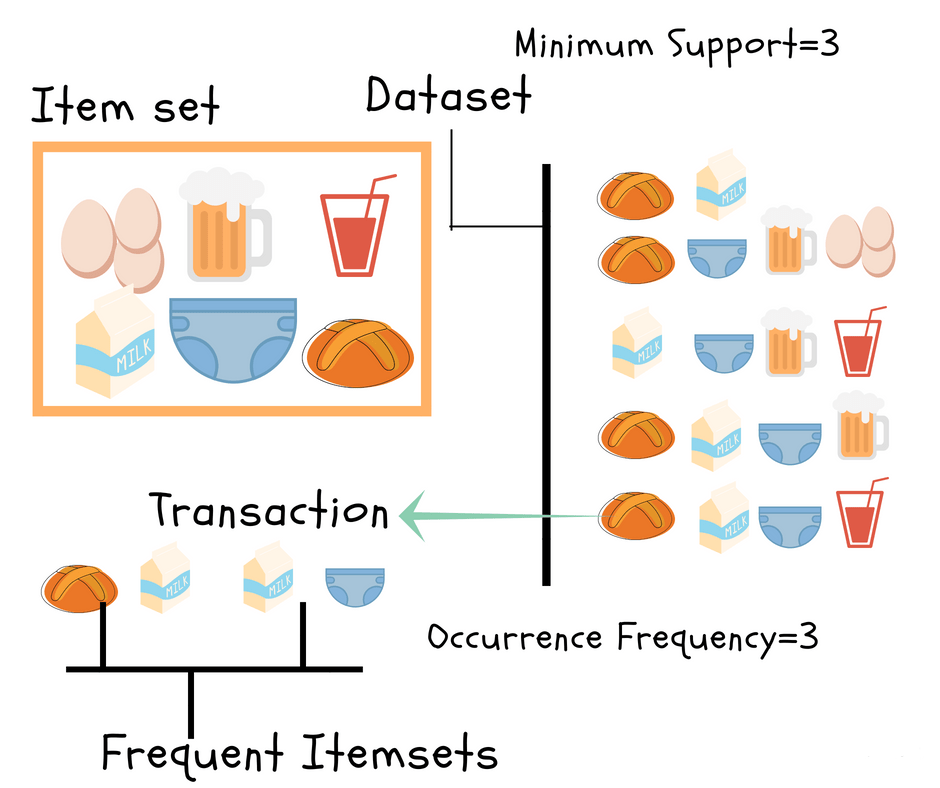

Problem Statement:

In recent times, the e-commerce sector has experienced significant growth and success, offering customers the convenience of a wide array of product choices that can be conveniently ordered from the comfort of their homes. However, the question arises as to how these e-commerce companies are able to provide such an extensive range of products. To meet customer demands, these companies must maintain substantial inventories in their warehouses. Within these inventories, some products are classified as fast-moving, with high sales velocity, while others are slow-moving. The storage and maintenance of each product entail costs for the company in terms of space and upkeep. Consequently, it becomes imperative for organizations to effectively plan their inventory to mitigate unnecessary expenses.

OList, an e-commerce enterprise, has recently faced financial losses and aims to optimize its inventory management to minimize avoidable costs. The objective of this assignment is to oversee the inventory cost management of OList. The key tasks involve identifying the top revenue-contributing products and utilizing market basket analysis to examine customer purchasing behavior. By doing so, it becomes possible to estimate, with a reasonable degree of certainty, which items are more likely to be purchased individually or in conjunction with other products.

# Data Exploration and Cleaning

In [129]:
# importing libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
#Reading orders sheet data
orders = pd.read_excel("Retail_dataset.xlsx", sheet_name = "orders")

In [131]:
orders.shape

(99441, 7)

In [132]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


For this project, we are only considering the order with status as 'delivered'.

In [133]:
orders = orders[orders.order_status == "delivered"]

In [134]:
#Checking null values
orders.isnull().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_timestamp         8
order_estimated_delivery_date     0
dtype: int64

The dataset contains two columns, namely "order_approved_at" and "order_delivered_timestamp" with missing values. To address this, we will perform imputation techniques.

For the "order_approved_at" column, we will assume that the missing values correspond to the same time as the "order_purchase_timestamp".

Regarding the "order_delivered_timestamp" column, we will assume that the missing values align with the "order_estimated_delivery_date."

By applying these imputations, we aim to fill in the null values in these columns and ensure the completeness of the dataset.

In [135]:
#Imputing the null values of the two columns "order_approved_at" and "order_delivered_timestamp"
orders.order_approved_at.fillna(orders.order_purchase_timestamp, inplace = True)
orders.order_delivered_timestamp.fillna(orders.order_estimated_delivery_date, inplace = True)

In [136]:
#Reading the order items data
order_items = pd.read_excel("Retail_dataset.xlsx", sheet_name = "order_items")

In [137]:
order_items.shape

(112650, 6)

In [138]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [139]:
#Checking for null values 
order_items.isnull().sum()

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

In [140]:
#Reading the customers data
customers = pd.read_excel("Retail_dataset.xlsx", sheet_name = "customers")

In [141]:
customers.shape

(99441, 4)

In [142]:
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [143]:
#Checking null values
customers.isna().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [144]:
#Checking for duplicate customer_id
customers.customer_id.duplicated().sum()

3345

In [145]:
#Dropping duplicate customer_id and keeping only the first one
customers.drop_duplicates(subset="customer_id", keep="first", inplace = True)

In [146]:
#Reading payments data
payments = pd.read_excel("Retail_dataset.xlsx", sheet_name = "payments")

In [147]:
payments.shape

(103886, 5)

In [148]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [149]:
#Checking null values
payments.isna().sum().sort_values(ascending = False)

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [150]:
#Reading products data
products = pd.read_excel("Retail_dataset.xlsx", sheet_name = "products")

In [151]:
products.shape

(32951, 6)

In [152]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [153]:
#Checking null values
products.isnull().sum()

product_id                 0
product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
dtype: int64

In [154]:
products

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,toys,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,toys,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,toys,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,toys,700.0,31.0,13.0,20.0


In [155]:
#Removing rows with null product category name
products = products[~products.product_category_name.isnull()]

In [156]:
products.isnull().sum()

product_id               0
product_category_name    0
product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
dtype: int64

In [157]:
products[products.product_weight_g.isnull()]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,toys,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,toys,NaN,NaN,NaN,NaN


Since null values of column is of toys category, will replace null values with median of toys category.

In [158]:
#Imputing the null values with the median of the column values of that category
products.product_weight_g.fillna(products[products.product_category_name == 'toys']['product_weight_g'].median(), inplace = True)
products.product_length_cm.fillna(products[products.product_category_name == 'toys']['product_length_cm'].median(), inplace = True)
products.product_height_cm.fillna(products[products.product_category_name == 'toys']['product_height_cm'].median(), inplace = True)
products.product_width_cm.fillna(products[products.product_category_name == 'toys']['product_width_cm'].median(), inplace = True)

## Merging Dataframes

In [159]:
ord_prod =pd.merge(order_items, products, on="product_id", how="inner", indicator=True)
ord_prod.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,_merge
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0,both
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,toys,650.0,28.0,9.0,14.0,both
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,toys,650.0,28.0,9.0,14.0,both
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,toys,650.0,28.0,9.0,14.0,both
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,toys,650.0,28.0,9.0,14.0,both


In [160]:
cust_ord =pd.merge(orders, customers, on="customer_id", how="inner", indicator=True)
cust_ord.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,_merge
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,both
1,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,3149,sao paulo,SP,both
2,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA,both
3,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,GO,both
4,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,59296,sao goncalo do amarante,RN,both


In [161]:
ord_pay = pd.merge(cust_ord, payments, on="order_id", how="inner")
ord_pay.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,_merge,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,both,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,both,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,both,2,voucher,1,18.59
3,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,3149,sao paulo,SP,both,1,credit_card,1,44.11
4,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA,both,1,wallet,1,141.46


In [162]:
order_final = pd.merge(ord_pay, ord_prod, on="order_id", how="inner")
order_final.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,...,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,_merge_y
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0,both
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0,both
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0,both
3,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,3149,sao paulo,SP,...,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,35.39,8.72,baby,350.0,19.0,14.0,12.0,both
4,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA,...,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,toys,400.0,19.0,13.0,19.0,both


In [163]:
order_final=order_final.drop({'_merge_x','_merge_y'},axis='columns')

In [164]:
order_final.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

# EDA

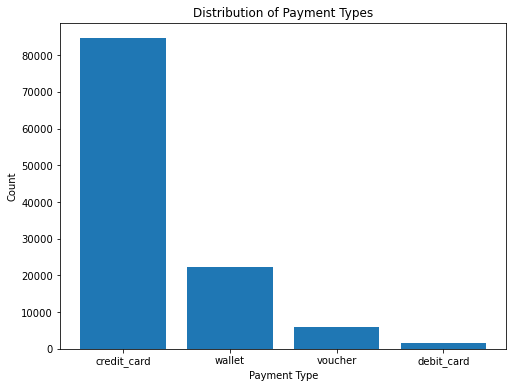

In [165]:
# Bar Chart - Payment Type
payment_type_counts = order_final['payment_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(payment_type_counts.index, payment_type_counts.values)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Distribution of Payment Types')
plt.show()

Credit card is the post preferable mode of payment for online shopping in e-commerce platform.

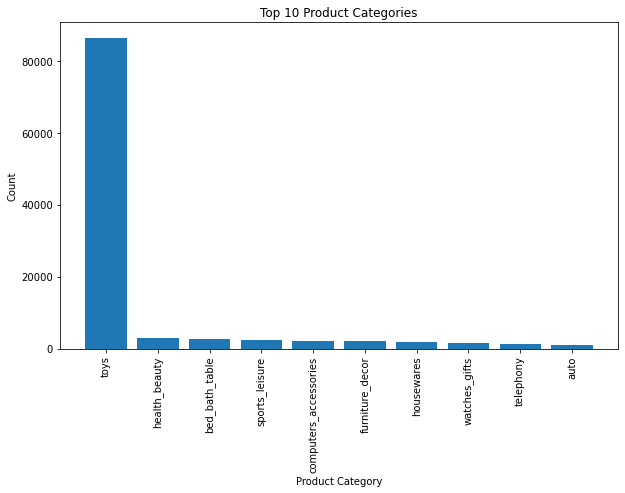

In [166]:
# Bar Chart - Product Category Name
product_category_counts = order_final['product_category_name'].value_counts().head(10)  # Top 10 categories
plt.figure(figsize=(10, 6))
plt.bar(product_category_counts.index, product_category_counts.values)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Top 10 Product Categories')
plt.xticks(rotation=90)
plt.show()

Toys is the most selling online product category.

<Figure size 720x864 with 0 Axes>

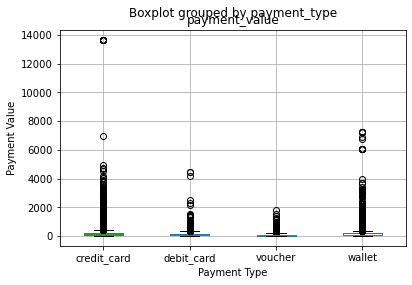

In [167]:
# Box Plot - Payment Value by Payment Type
plt.figure(figsize=(10, 12))
order_final.boxplot(column='payment_value', by='payment_type')
plt.xlabel('Payment Type')
plt.ylabel('Payment Value')
plt.show()

Payment amount done by the credit card are highest.

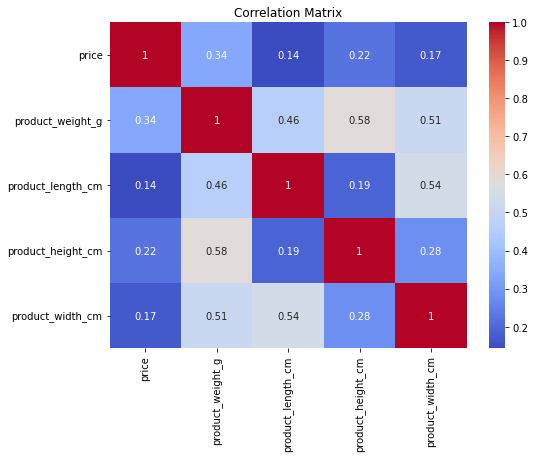

In [168]:
# Heatmap/Correlation Matrix
correlation_matrix = order_final[['price', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Product Height and Weight has good correlation.

# RFM Model

RFM model, also known as Recency, Frequency, Monetary model, is a customer segmentation framework used in marketing and customer relationship management (CRM). It enables businesses to analyze and categorize customers based on their transactional behavior and value.

RFM stands for:

Recency: Refers to how recently a customer has made a purchase. It measures the time gap between a customer's last transaction and the present date. Generally, customers who have made a purchase more recently are considered more engaged and likely to make repeat purchases.

Frequency: Represents the frequency or number of purchases made by a customer within a specific period. It indicates how often a customer interacts with the business. Higher frequency typically indicates higher engagement and loyalty.

Monetary: Reflects the monetary value of a customer's purchases. It measures the total amount spent by a customer during a given period. Customers with higher monetary value contribute more revenue to the business and are often considered high-value customers.

In [169]:
# Convert date columns to datetime
date_columns = ['order_purchase_timestamp', 'order_delivered_timestamp', 'order_approved_at',
                'order_estimated_delivery_date']
for column in date_columns:
    order_final[column] = pd.to_datetime(order_final[column])

In [170]:
# Calculate recency, frequency, and monetary value
snapshot_date = order_final['order_purchase_timestamp'].max() + pd.DateOffset(days=1)  # Snapshot date is the latest purchase date + 1 day

rfm = order_final.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'payment_value': 'sum'  # Monetary Value
})

# Rename the columns
rfm.rename(columns={
    'order_purchase_timestamp': 'recency',
    'order_id': 'frequency',
    'payment_value': 'monetary_value'
}, inplace=True)

In [171]:
# Extract the relevant columns for clustering
features = rfm.copy()

In [172]:
# Remove outliers
features = features[(features['recency'] >= np.percentile(features['recency'], 5)) &
                        (features['recency'] <= np.percentile(features['recency'], 95))]
features = features[(features['frequency'] >= np.percentile(features['frequency'], 5)) &
                        (features['frequency'] <= np.percentile(features['frequency'], 95))]
features = features[(features['monetary_value'] >= np.percentile(features['monetary_value'], 5)) &
                        (features['monetary_value'] <= np.percentile(features['monetary_value'], 95))]

In [173]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit_transform
features = scaler.fit_transform(features)
features.shape

(72792, 3)

In [174]:
features = pd.DataFrame(features)
features.columns = ['recency','frequency','monetary_value']
features.head()

,recency,frequency,monetary_value
0,-0.912966,-0.34755,0.032086
1,0.672632,-0.34755,-0.963670
2,0.422274,-0.34755,0.589235
3,-0.655022,-0.34755,0.286192
4,-0.761234,-0.34755,-1.047157


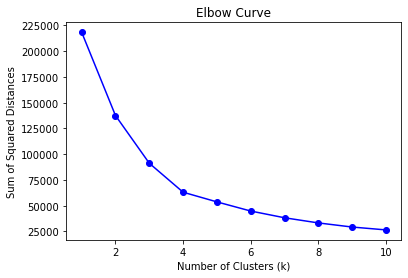

In [175]:
# Define a range of values for k (number of clusters)
k_values = range(1, 11)
ssd = []

# Fit KMeans model for each value of k and calculate sum of squared distances
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    ssd.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, ssd, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Curve')
plt.show()

We will take 4 as an optimal number of clusters since we can see a significant slow down after that and adding more clusters does not result in a significant improvement in the clustering quality.

In [176]:
# Create RFM score segments
# For recency, lower values are better (e.g., the lower the recency, the more recent the purchase)
rfm['recency_score'] = pd.qcut(rfm['recency'], q=4, labels=False)

# For frequency and monetary value, higher values are better
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method='first'), q=4, labels=False)
rfm['monetary_score'] = pd.qcut(rfm['monetary_value'], q=4, labels=False)

# Calculate RFM total score
rfm['rfm_score'] = rfm['recency_score'] + rfm['frequency_score'] + rfm['monetary_score']

# Categorize customers based on RFM score
score_labels = ['Low', 'Medium', 'High', 'Very High']
rfm['rfm_segment'] = pd.qcut(rfm['rfm_score'], q=4, labels=score_labels)

In [177]:
rfm.rfm_segment.value_counts()

Low          30994
High         29370
Medium       16588
Very High    16117
Name: rfm_segment, dtype: int64

## Observation:

Based on the provided customer segment counts, we can make the following observations:

1. The majority of customers fall into the "Low" segment, with a count of 30,994. This suggests that a significant portion of customers have lower transactional behavior and value in terms of recency, frequency, and monetary aspects.

2. The "High" segment has the second-highest count of 29,370 customers. This indicates a relatively large group of customers who exhibit high transactional behavior and value, implying that they have made recent purchases, frequent transactions, and spent a significant amount of money.

3. The "Medium" segment has a count of 16,588 customers, indicating a moderate level of transactional behavior and value. Customers in this segment may not be as active or valuable as those in the "High" segment, but they still show a reasonable level of engagement.

4. The "Very High" segment consists of 16,117 customers, which suggests a subset of customers who exhibit exceptionally high transactional behavior and value. These customers are likely the most active and valuable in terms of their recent purchases, frequency, and spending.

# Market Basket Technique


The market basket technique, also known as market basket analysis or association analysis, is a data mining method used to discover relationships between items frequently purchased or used together. It is often applied in retail and e-commerce settings to analyze customer purchase patterns and uncover associations between products.

The market basket technique aims to identify associations or correlations between items based on the co-occurrence of those items in transactions. It helps businesses understand which items are frequently bought together by customers, enabling them to make informed decisions regarding product placement, cross-selling, and targeted marketing strategies.

In [178]:
prd_category=order_final.groupby(by=['order_id','product_category_name'])['order_item_id'].count().unstack().reset_index().set_index('order_id').fillna(0)
prd_category

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00018f77f2f0320c557190d7a144bdd3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
000229ec398224ef6ca0657da4fc703e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00024acbcdf0a6daa1e931b038114c75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffcd46ef2263f404302a634eb57f7eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
fffce4705a9662cd70adb13d4a31832d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [179]:
#Encoding data
def encode_data(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
basket_encode = prd_category.applymap(encode_data)
basket_encode

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00018f77f2f0320c557190d7a144bdd3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
000229ec398224ef6ca0657da4fc703e,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00024acbcdf0a6daa1e931b038114c75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00042b26cf59d7ce69dfabb4e55b4fd9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffcd46ef2263f404302a634eb57f7eb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
fffce4705a9662cd70adb13d4a31832d,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [180]:
basket_encode = basket_encode[(basket_encode>0).sum(axis=1)>=2]
basket_encode

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00337fe25a3780b3424d9ad7c5a4b35e,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
00946f674d880be1f188abc10ad7cf46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00bcee890eba57a9767c7b5ca12d3a1b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
01144cadcf64b6427f0a6580a3033220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
013a98b3a668bcef05b98898177f6923,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff632bc583a94f23c59db4cbaa0ba2ab,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ffa466d3e55f98477b7e0da764df3c6c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ffb9a9cd00c74c11c24aa30b3d78e03b,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [181]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [182]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Perform market basket analysis using Apriori algorithm
frequent_itemsets = apriori(basket_encode, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)

In [183]:
# Print the frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
     support                       itemsets
0   0.230889               (bed_bath_table)
1   0.084243        (computers_accessories)
2   0.127145              (furniture_decor)
3   0.065523                (health_beauty)
4   0.053822                   (housewares)
5   0.054602               (sports_leisure)
6   0.971139                         (toys)
7   0.058502                (watches_gifts)
8   0.226989         (toys, bed_bath_table)
9   0.080343  (toys, computers_accessories)
10  0.119345        (toys, furniture_decor)
11  0.062402          (toys, health_beauty)
12  0.056942          (watches_gifts, toys)


In [184]:
# Print the association rules
print("\nAssociation Rules:")
rules


Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(toys),(bed_bath_table),0.971139,0.230889,0.226989,0.233735,1.012325,0.002764,1.003714,0.421845
1,(bed_bath_table),(toys),0.230889,0.971139,0.226989,0.983108,1.012325,0.002764,1.708580,0.015830
2,(toys),(computers_accessories),0.971139,0.084243,0.080343,0.082731,0.982047,-0.001469,0.998351,-0.387791
3,(computers_accessories),(toys),0.084243,0.971139,0.080343,0.953704,0.982047,-0.001469,0.623401,-0.019573
4,(toys),(furniture_decor),0.971139,0.127145,0.119345,0.122892,0.966546,-0.004131,0.995151,-0.545301
5,(furniture_decor),(toys),0.127145,0.971139,0.119345,0.938650,0.966546,-0.004131,0.470437,-0.038141
6,(toys),(health_beauty),0.971139,0.065523,0.062402,0.064257,0.980685,-0.001229,0.998647,-0.405622
7,(health_beauty),(toys),0.065523,0.971139,0.062402,0.952381,0.980685,-0.001229,0.606084,-0.020642
8,(watches_gifts),(toys),0.058502,0.971139,0.056942,0.973333,1.002260,0.000128,1.082293,0.002395
9,(toys),(watches_gifts),0.971139,0.058502,0.056942,0.058635,1.002260,0.000128,1.000140,0.078119


## Observations:

1. The rule (toys) => (bed_bath_table) and (bed_bath_table) => (toys) both have relatively high support and confidence values, indicating a strong association between toys and bed and bath products. This suggests that customers who purchase toys are likely to also purchase bed and bath products, and vice versa. This association can be utilized for targeted promotions or product bundling strategies.

2. The rule (toys) => (computers_accessories) and (computers_accessories) => (toys) show a weak association between toys and computer accessories. The low support and confidence values suggest that these two categories are not commonly purchased together. Marketing efforts or strategies focusing on these two categories may need to be adjusted accordingly.

3. Similarly, the rule (toys) => (furniture_decor) and (furniture_decor) => (toys) indicate a weak association between toys and furniture decor. Customers who purchase toys are less likely to purchase furniture decor, as indicated by the low support and confidence values. Adjustments in marketing or product placement may be required to improve the association between these categories.

4. The rules (toys) => (health_beauty) and (health_beauty) => (toys) show a weak association between toys and health and beauty products. Customers who buy toys are not likely to purchase health and beauty products, as indicated by the low support and confidence values. This suggests that these categories may not be complementary, and separate marketing strategies may be needed for each category.

5. The rule (toys) => (watches_gifts) and (watches_gifts) => (toys) indicate a weak association between toys and watches/gifts. The low support and confidence values suggest that customers who purchase toys are less likely to purchase watches or gifts, and vice versa. Adjustments in marketing or product bundling strategies may be necessary to strengthen the association between these categories.